<a href="https://colab.research.google.com/github/seoboran/s_edu/blob/master/0818_iris_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 개요 
 iris 붓꽃 분류 모형을 만든다.

### (1) 패키지 불러오기 
 sklearn 패키지를 불러온다
 
 패키지는 시간이 지남에 따라 업그레이드 되므로 버전 체크


In [2]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


### (2) 데이터 불러오기 
 sklearn 패키지 내장 데이터 있음

In [3]:
from sklearn.datasets import load_iris 

iris=load_iris() # bunch 형태의 데이터셋으로 구성되어 있음 

# 독립변수 구성된 데이터 독립변수: 직접 변경하는 변수
iris_data=iris.data
# 종속변수: 독립변수에 따라 달라지는 변수 
iris_label = iris.target
# iris.target은 붓꽃 데이터 세트에서 레이블을 NumPy로 가지고 있다. 

print('iris target값:', iris_label[[0, 50, 100]])
print('iris target명:', iris.target_names)

iris target값: [0 1 2]
iris target명: ['setosa' 'versicolor' 'virginica']


### (2) 데이터 전처리
-상황: numpy형태, 리스트 
-방법: pandas를 활용해서, 데이터 프레임 만들기
-ref. How to convert a Scikit-learn dataset to a Pandas dataset?[https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878]

In [4]:
import pandas as pd

In [5]:
from sklearn import datasets
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## (4)데이터 시각화 
-시각화를 위한 전처리 

In [30]:
temp_data=df_iris.copy()
#print(temp_data.info())

#column명 바꾸기 
temp_data.columns=["sepal_length" ,"sepal_width", "petal_length" ,"petal_width","species"]
#temp_data.info()

#map
# 시각화를 위해 species의 0, 1, 2를 [‘setosa’ ‘versicolor’ ‘virginica’] 형태로 바꾼다.
# 0->'setosa',1->'versicolor',2->'virginica'
replace_fct={0:'setaosa',1:'versicolor',2:'virginica'}
temp_data['species']=temp_data['species'].map(replace_fct) # map 함수는 Function을 실행하고 Function에서 나온 값을 저장해서 새로운 배열로 만다는 것이다.
print(temp_data.head(3).to_markdown()) 

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setaosa   |
|  1 |            4.9 |           3   |            1.4 |           0.2 | setaosa   |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setaosa   |


- 수치형 데이터, 히스토그램 & 박스플롯 & 산점도

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


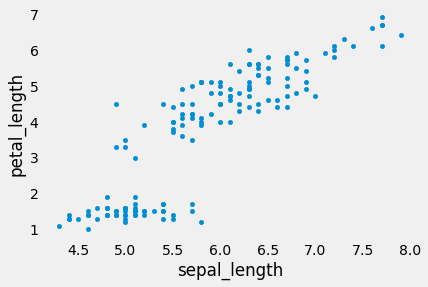

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore') 


temp_data.plot(kind ="scatter", 
          x ='sepal_length', 
          y ='petal_length') 

plt.grid() 



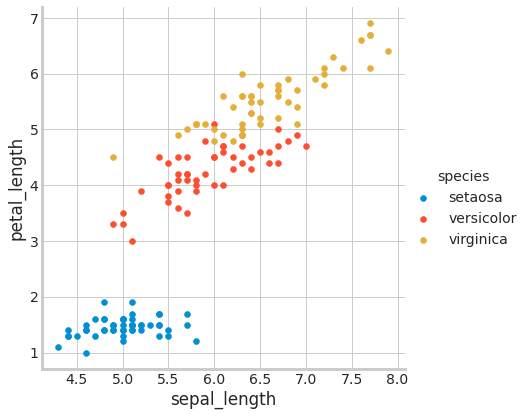

In [8]:
sns.set_style("whitegrid") 
  

  
sns.FacetGrid(temp_data, hue ="species",  
              height = 6).map(plt.scatter,  
                              'sepal_length',  
                              'petal_length').add_legend()

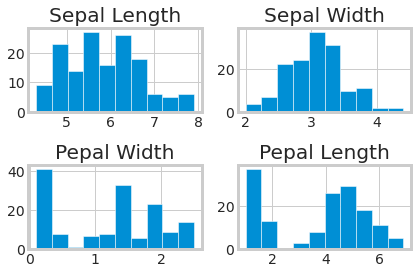

In [32]:
import matplotlib.pyplot as plt

n_bins = 10
fig, axs = plt.subplots(2, 2) # 그래프를 그리기 위해 일종의 레이아웃을 작성한다. 
axs[0, 0].hist(temp_data['sepal_length'], bins = n_bins); # hist 히스토그램 형태
axs[0, 0].set_title('Sepal Length'); # 표의 타이틀 지정
axs[0, 1].hist(temp_data['sepal_width'], bins = n_bins);
axs[0, 1].set_title('Sepal Width');   # bins: 각 빈의 왼쪽 가장자리
axs[1, 0].hist(temp_data['petal_width'], bins = n_bins);
axs[1, 0].set_title('Pepal Width');
axs[1, 1].hist(temp_data['petal_length'], bins = n_bins);
axs[1, 1].set_title('Pepal Length');

fig.tight_layout(pad=1.0);

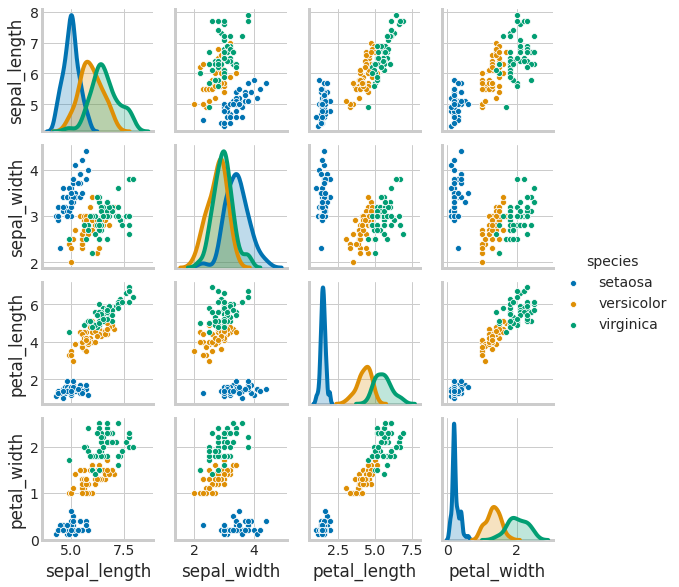

In [9]:
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind')

### (5)데이터셋 분리
학습용 데이터와 테스트용 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split  
# 훈련 데이터와 텍스트 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(iris_data,  # 독립변수 
                                                    iris_label, # 종속변수 
                                                    test_size = 0.2, 
                                                    random_state = 1)

-array=

-test_size= 비율(훈련데이터/텍스트 데이터)

-random_state= 실험의 제한성을 위한 코드

### (6)머신러닝 모형 학습
 머신러닝 모형을 만듭시다

In [22]:
from sklearn.tree import DecisionTreeClassifier
# 객체 생성
df_clf=DecisionTreeClassifier(random_state=11,max_depth=2)
df_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### (7) 모형 테스트
모형 예측

In [23]:
from sklearn.metrics import accuracy_score
pred = df_clf.predict(X_test)
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is: 0.967


### (8)모형 결과 시각화
 모형 결과에 대해 혼동행렬로 시각화


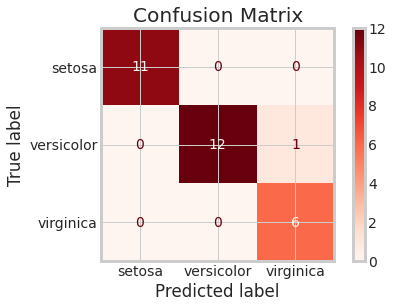

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(df_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

적합한 모형의 결과를 시각화로 재구성 

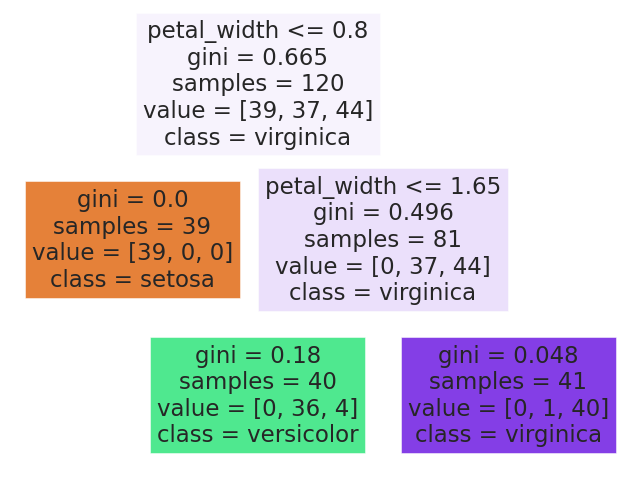

In [25]:
import matplotlib.pyplot as plt

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(df_clf, feature_names = explt_vars, class_names = fct_val, filled = True);
         

의사결정 나무 -비교하면서 가지치기 

gini : 불순도
불순도 얼마만큼 순수하냐 순수하지 않냐 
완벽히 분류가 되면 0 

In [27]:
gini=1-(0/40)**2-(36/40)**2-(4/40)**2
gini

0.17999999999999994

Text(4.05, 0.5, '(Depth=2)')

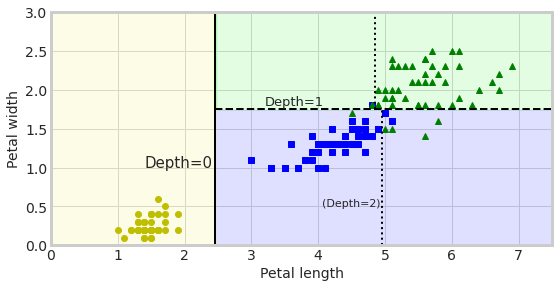

In [28]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)